### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 8
### Due: Saturday, Apr 6th at 11.59pm CT
---

## Only one problem this week

1. Use the following code snippet to read in SDSS galaxy color data.
<!--```
from astroML.datasets import fetch_sdss_galaxy_colors
data = fetch_sdss_galaxy_colors()
```-->

`data = np.load('../hw_data/hw8_data_1.npy')`

This is a structured numpy array. Find and print all of the column names. Using the data, create arrays of $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create arrays of redshift and the spectral class. How many regular galaxies and how many quasars are in this sample?


In [45]:
#importing tools
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#loading in data
data = np.load('/home/nowickr/astr_8070_s24/coursework/homeworks/hw_data/hw8_data_1.npy')

#printing names of columns
data.dtype.names

('u', 'g', 'r', 'i', 'z', 'specClass', 'redshift', 'redshift_err')

In [34]:
#creating arrays of colors
ug = data['u'] - data['g']
gr = data['g'] - data['r']
ri = data['r'] - data['i']
iz = data['i'] - data['z']
#creating arrays of redshift and spectral class
redshift = data['redshift']
redshift_err = data['redshift_err']
specClass = data['specClass']

In [25]:
#getting indicies of galaxies and quasars
gal_index = np.where(specClass==['GALAXY'])
qsar_index = np.where(specClass==['QSO'])

#setting up new arrays for galaxies and quasars
galaxies = specClass[gal_index]
quasars = specClass[qsar_index]

print('Number of Galaxies:', len(galaxies))
print('Number of Quasars:', len(quasars))

Number of Galaxies: 42808
Number of Quasars: 7192


2. Make a scatter plot of $(u-g)$ versus $(g-r)$, color coding by galaxy or quasar class. The plot should include appropriate axis labels and a legend. Set `xlim` between -0.5 and 2.5, and `ylim` between -0.5 and 1.5.


(-0.5, 1.5)

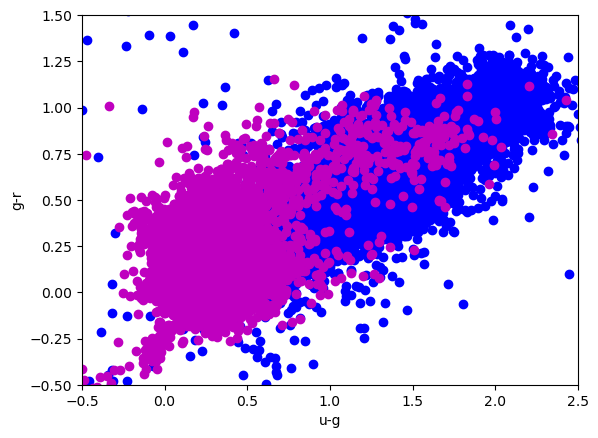

In [32]:
#scatterplot
plt.scatter(ug[gal_index], gr[gal_index], color='b', label='Galaxies') #plotting galaxies
plt.scatter(ug[qsar_index], gr[qsar_index], color='m', label='Quasars') #plotting quasars
plt.ylabel('g-r')
plt.xlabel('u-g')
plt.xlim(-0.5,2.5)
plt.ylim(-0.5,1.5)


3. Stack all colors and the redshift into a data matrix, $X$. Create a target label array that has $0$ for a regular galaxy and $1$ for a quasar. Perform a train-test split, taking $20\%$ of the data for testing.



In [51]:
#stacking into data matrix
X = np.vstack((ug, gr, ri, iz, redshift)).T #taking transpose to get rows corresponding to specific objects
print(ug)
print(X)

[0.57029 2.04144 1.84529 ... 0.63545 0.30073 0.5429 ]
[[0.57029    0.04138    0.02815    0.28811    2.312959  ]
 [2.04144    0.98938    0.48183    0.3653     0.05187586]
 [1.84529    1.0416     0.45719    0.39585    0.09769295]
 ...
 [0.63545    0.08109    0.10749    0.26389    2.267401  ]
 [0.30073    0.16404    0.05842    0.01814    1.407278  ]
 [0.5429     0.13127    0.16219    0.10183    0.6865192 ]]


In [50]:
#creating target label array (0 for gal, 1 for qso)
target_label = np.zeros(50000)
target_label[qsar_index] = 1

print(target_label)

[1. 0. 0. ... 1. 1. 1.]


In [53]:
#importing tool
from sklearn.model_selection import train_test_split

#performing train-test-split
X_train, X_test, target_train, target_test = train_test_split(X, target_label, test_size=0.2)

In [54]:
print(len(X_train))
print(len(X_test))

40000
10000



4. Create a compact `for` loop that iterates over the fitting of a Gaussian Naive Bayes classification algorithm to successively more features of the data. Within the loop, compute and plot an ROC curve. The end result should be a plot showing ROC curves for GNB classification with more and more features of the data, with appropriate axis labels and a legend. Use `xlim` between 0 and 0.01. Which feature seems to make the classification trivially easy? *Note: `predict_proba` returns an array with as many columns as classes. You've labeled quasars as $1$, so for the ROC curve you must make sure to access the relevant quasar probability-- you can find this by accessing the **classes_** attribute of the estimator.*



In [67]:
#importing naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve

(0.0, 0.01)

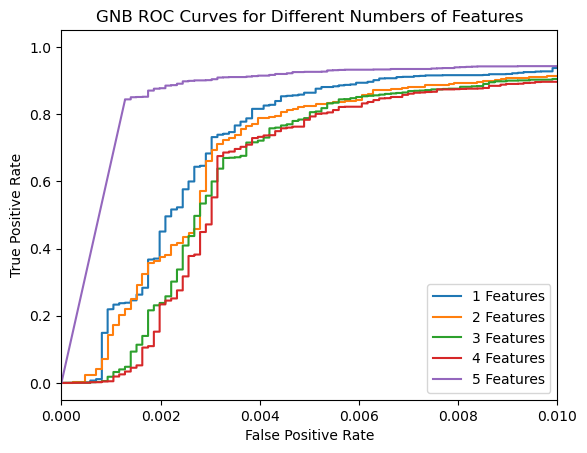

In [84]:
#creating for loop
for i in range(len(X.T)): #five times
    #getting iteratively more features out of test and train data
    features = X_train[:,:(i+1)]
    test = X_test[:,:(i+1)]
    #fitting model
    gauss_naive = GaussianNB()
    gauss_naive.fit(features, target_train)
    #making predictions
    prob_pred = gauss_naive.predict_proba(test)
    qsar_prob = gauss_naive.classes_
    #print(qsar_prob)
    #print(targ_pred)    

    # Second axis shows the ROC curves (code from Lecture 20)
    #for name, y_prob in zip(names, probs):
    fpr, tpr, thresholds = roc_curve(target_test, prob_pred[:,1]) #false positive right, true positive right, thresholds

    fpr = np.concatenate([[0], fpr])
    tpr = np.concatenate([[0], tpr])

    plt.plot(fpr, tpr, label='%i Features' %(i+1))# label=labels[name])

#ax2.set_xlabel('false positive rate')
#ax2.set_ylabel('true positive rate')
#ax2.xaxis.set_major_locator(plt.MaxNLocator(5))

plt.title('GNB ROC Curves for Different Numbers of Features')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.xlim(0,0.01)

<font color='lime'> The final feature, redshift (Feature 5), appears to do the most in optimizing the ROC curve. Given that we are doing a photometric redshift classification, having redshift makes this job easy. For the trickier job of only having colors, the area under the ROC curve would actually need to be calculated to determine the best number of features.


5. Repeat (4) for Quadratic Discriminant Analysis. 



In [82]:
#using Quadratic Discriminant Analysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

(0.0, 0.01)

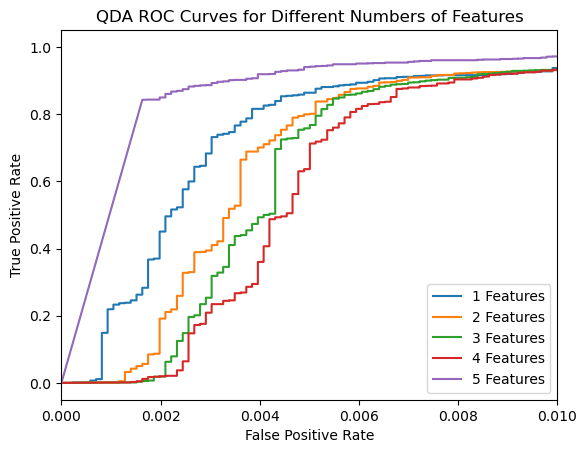

In [85]:
#creating for loop
for i in range(len(X.T)): #five times
    #getting iteratively more features out of test and train data
    features = X_train[:,:(i+1)]
    test = X_test[:,:(i+1)]
    #fitting model
    qda = QuadraticDiscriminantAnalysis()
    qda.fit(features, target_train)
    #making predictions
    prob_pred = qda.predict_proba(test)
    qsar_prob = qda.classes_
    #print(qsar_prob)
    #print(targ_pred)    

    # Second axis shows the ROC curves (code from Lecture 20)
    #for name, y_prob in zip(names, probs):
    fpr, tpr, thresholds = roc_curve(target_test, prob_pred[:,1]) #false positive right, true positive right, thresholds

    fpr = np.concatenate([[0], fpr])
    tpr = np.concatenate([[0], tpr])

    plt.plot(fpr, tpr, label='%i Features' %(i+1))# label=labels[name])

#ax2.set_xlabel('false positive rate')
#ax2.set_ylabel('true positive rate')
#ax2.xaxis.set_major_locator(plt.MaxNLocator(5))

plt.title('QDA ROC Curves for Different Numbers of Features')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.xlim(0,0.01)

<font color='lime'> Likewise with the Gaussian Naive Bayes, the Quadratic Method tells us that redshift is the most informative of the features, but shows much improvement when adding in features 1 through 4 unlike the GNB method.


6. Let's try classification with GMM Bayes. Restrict the training and testing to be just on the $4$ colors. Iterate now over number of components in the GMM Bayes fit up to $10$, plotting ROC curves for all, and find the number of components that gives the best performance.



In [86]:
#importing GMM Bayes
from astroML.classification import GMMBayes

In [91]:
#removing redshift data
Xcolors_train, Xcolors_test = X_train[:,:4], X_test[:,:4]

(0.0, 0.01)

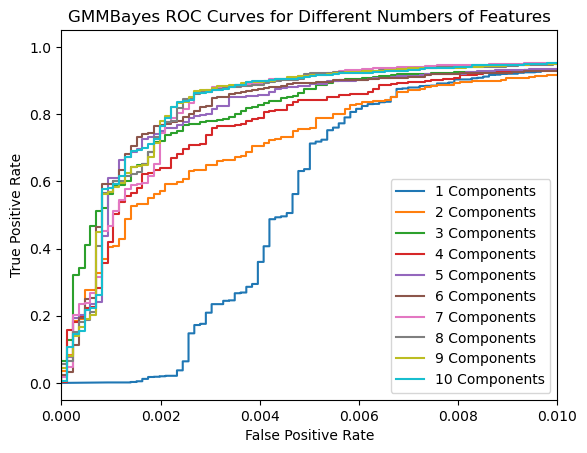

In [102]:
N = 10 #max number of components
integ = [] #array to hold integral values
#creating component for loop
for n in range(1,N+1): #ten times
    #getting iteratively more features out of test and train data
    features = Xcolors_train
    test = Xcolors_test
    #fitting model
    gmm = GMMBayes(n_components=n)
    gmm.fit(features, target_train)
    #making predictions
    prob_pred = gmm.predict_proba(test)
    qsar_prob = gmm.classes_
    #print(qsar_prob)
    #print(targ_pred)    

    # Second axis shows the ROC curves (code from Lecture 20)
    #for name, y_prob in zip(names, probs):
    fpr, tpr, thresholds = roc_curve(target_test, prob_pred[:,1]) #false positive right, true positive right, thresholds

    fpr = np.concatenate([[0], fpr])
    tpr = np.concatenate([[0], tpr])

    plt.plot(fpr, tpr, label='%i Components' %n )# label=labels[name])

    #integral area under curve
    dx = 1/len(fpr)
    integral = np.sum(tpr*dx)
    integ.append(integral)

#ax2.set_xlabel('false positive rate')
#ax2.set_ylabel('true positive rate')

plt.title('GMMBayes ROC Curves for Different Numbers of Features')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.xlim(0,0.01)

(1.0, 10.0)

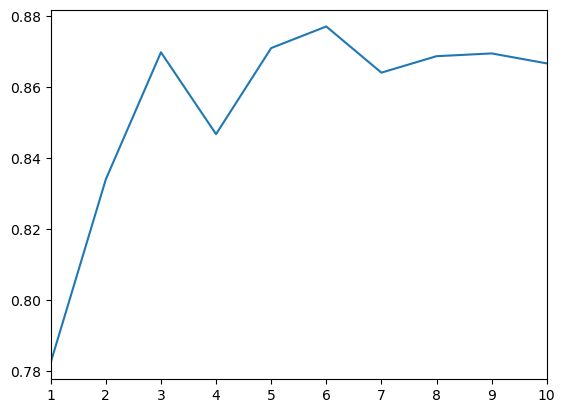

In [103]:
plt.plot(np.linspace(1,10,10),integ, label='Area Under ROC Curve')
plt.xlim(1,10)


7. Repeat (6) for $K$-nearest neighbor classification, looping over number of neighbors between 5 and 100 in steps of 10. Find the number that gives the best performance. 


In [ ]:
#importing KNN
from sklearn.neighbors import KNeighborsClassifier



8. Repeat (6) for Decision Tree classification, looping over the maximum tree depth between 1 and 10. Find the number that gives the best performance. 


In [ ]:
#importing decision trees
from sklearn.tree import DecisionTreeClassifier



9. Finally, plot the ROC curves for GNB, QDA, and the best-performing GMMBayes, KNN, and DT classification algorithms, all using just the 4 colors. What is the overall best-performing classifier? 




10. Make a 2-panel plot, showing in the left panel the color-coded training data in $(u-g)$ versus $(g-r)$ (similar to item 2 above), and in the right panel the same features of the testing data color coded by their predicted class from the tuned best-performing classifier. 